<a href="https://colab.research.google.com/github/widyandita/OrangeQualityAnalysis/blob/main/Orange_Quality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Kualitas Jeruk
Melakukan analisis Univariate dan Multivariate pada dataset kualitas jeruk.

## Sekilas Mengenai Dataset

Sumber dataset : https://www.kaggle.com/datasets/shruthiiiee/orange-quality

Dataset terdiri atas 8 kolom numerik dan 3 kolom kategori
- Size: Ukuran jeruk dalam cm (kemungkinan ukuran yang dimaksud adalah diameter karena satuannya cm)
- Weight: Berat buah dalam gram
- Brix: Tingkat kemanisan dalam Brix
- pH: Tingkat keasaman (pH)
- Softness: Kelembutan buah (1-5)
- HarvestTime: Hari setelah panen
- Ripeness: Tingkat kematangan (1-5)
- Color: Warna jeruk
- Variety: Varietas jeruk
- Blemishes: Adanya noda (Yes/No)
- Quality: Rating kualitas secara umum (1-5)

## Exploratory Data Analysis Yang Dilakukan
- Univariate : untuk mengetahui persebaran dan pemusatan data
- Bi/Multivariate : untung mengetahui hubungan antar variabel

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

## 1. Loading and Understanding the Data

In [ ]:
data_ori = pd.read_csv('Orange Quality Data (Clean).csv')

In [ ]:
data = data_ori.copy()

In [ ]:
data.columns

Index(['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
       'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Color',
       'Variety', 'Blemishes (Y/N)', 'Quality (1-5)'],
      dtype='object')

In [ ]:
data.columns.shape

(11,)

### a. Melakukan perubahan bahasa pada nama kolom untuk memudahkan pembacaan data

In [ ]:
new_columns = ['Ukuran (cm)', 'Berat (g)', 'Brix (Kemanisan)', 'pH (Keasaman)',
               'Kelunakan (1-5)', 'WaktuPanen (hari)', 'Kematangan (1-5)', 'Warna',
               'Varietas', 'Blemishes (Yes/No)', 'Kualitas (1-5)']
data.columns = new_columns

In [ ]:
data.head()

,Ukuran (cm),Berat (g),Brix (Kemanisan),pH (Keasaman),Kelunakan (1-5),WaktuPanen (hari),Kematangan (1-5),Warna,Varietas,Blemishes (Yes/No),Kualitas (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,No,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,No,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,No,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,No,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Yes,4.5


### b. Menelurusi tipe data tiap kolom dan jumlah nilai unik beberapa kolom

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ukuran (cm)         241 non-null    float64
 1   Berat (g)           241 non-null    int64  
 2   Brix (Kemanisan)    241 non-null    float64
 3   pH (Keasaman)       241 non-null    float64
 4   Kelunakan (1-5)     241 non-null    float64
 5   WaktuPanen (hari)   241 non-null    int64  
 6   Kematangan (1-5)    241 non-null    float64
 7   Warna               241 non-null    object 
 8   Varietas            241 non-null    object 
 9   Blemishes (Yes/No)  241 non-null    object 
 10  Kualitas (1-5)      241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [ ]:
data['Kematangan (1-5)'].value_counts().sort_values(ascending=False)

Kematangan (1-5)
5.0    58
4.0    52
3.0    46
2.0    27
4.5    23
1.0    17
3.5    12
2.5     6
Name: count, dtype: int64

In [ ]:
data['Kualitas (1-5)'].value_counts().sort_values(ascending=False)

Kualitas (1-5)
4.0    76
5.0    52
4.5    29
3.0    26
3.5    23
2.0    14
2.5    12
1.0     9
Name: count, dtype: int64

### c. Menelusuri data kategori

In [ ]:
categorical = data.select_dtypes(include=['object']).columns.tolist()
categorical

['Warna', 'Varietas', 'Blemishes (Yes/No)']

In [ ]:
categorical = data[categorical]
categorical.describe().round(2)

,Warna,Varietas,Blemishes (Yes/No)
count,241,241,241
unique,5,24,2
top,Deep Orange,Cara Cara,No
freq,75,21,151


### d. Menelusuri data numerik

In [ ]:
numerical = data.select_dtypes(exclude=['object']).columns.tolist()
numerical

['Ukuran (cm)',
 'Berat (g)',
 'Brix (Kemanisan)',
 'pH (Keasaman)',
 'Kelunakan (1-5)',
 'WaktuPanen (hari)',
 'Kematangan (1-5)',
 'Kualitas (1-5)']

In [ ]:
numerical = data[numerical]
numerical.describe().round(2)

,Ukuran (cm),Berat (g),Brix (Kemanisan),pH (Keasaman),Kelunakan (1-5),WaktuPanen (hari),Kematangan (1-5),Kualitas (1-5)
count,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00
mean,7.84,205.13,10.91,3.47,3.07,15.34,3.60,3.82
std,1.09,56.46,2.76,0.42,1.32,5.32,1.21,1.01
min,6.00,100.00,5.50,2.80,1.00,4.00,1.00,1.00
25%,6.90,155.00,8.50,3.20,2.00,11.00,3.00,3.00
50%,7.80,205.00,11.00,3.40,3.00,15.00,4.00,4.00
75%,8.70,252.00,13.40,3.80,4.00,20.00,4.50,4.50
max,10.00,300.00,16.00,4.40,5.00,25.00,5.00,5.00


## 2. Univariate
Memahami distribusi, bentuk, keberagaman, dan pusat data. Kemudian melakukan beberapa analisis terhadap rating kualitas jeruk terbaik.

### a. Data Numerik

Bentuk visualisasi data yang digunakan :
- Histogram : untuk melihat bentuk persebaran data (skewness)
- Box plot : untuk melihat pemusatan data
- Violin plot : untuk melihat pemusatan data sekaligus bentuk persebarannya

Visualisasi dilakukan terhadap kolom :
- Ukuran (cm)
- Berat (g)
- Brix (Kemanisan)
- pH (Keasaman)
- Kelunakan (1-5)
- Kematangan (1-5)
- Kualitas (1-5)

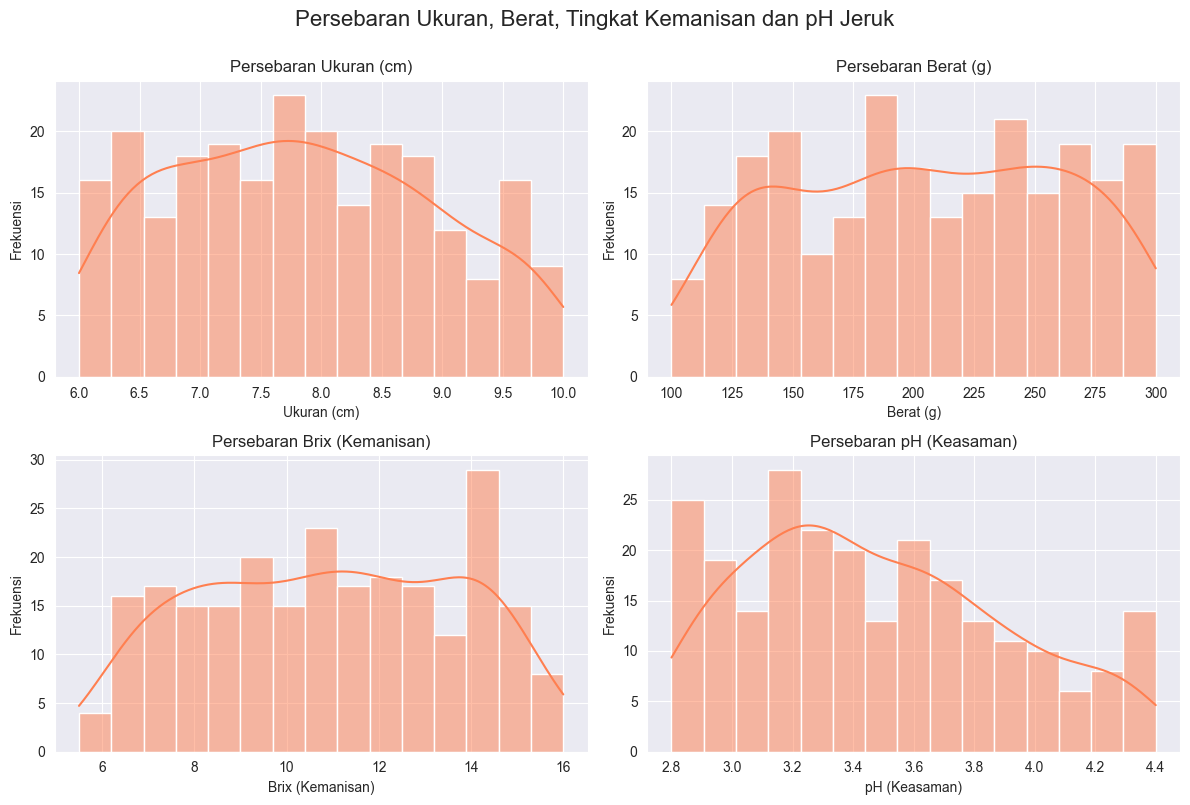

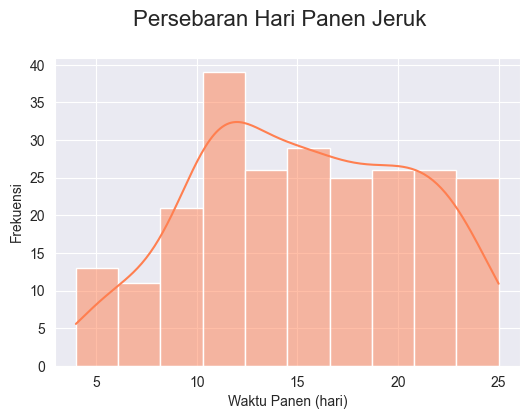

In [ ]:
num_columns = ['Ukuran (cm)', 'Berat (g)', 'Brix (Kemanisan)', 'pH (Keasaman)']

rows = 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

for i, column in enumerate(num_columns):
    row = i // rows
    col = i % cols
    sns.histplot(data[column], ax=axes[row, col], bins=15, kde=True, color='coral')
    axes[row, col].set_title(f'Persebaran {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frekuensi')

plt.suptitle('Persebaran Ukuran, Berat, Tingkat Kemanisan dan pH Jeruk', y=1, fontsize=16)
plt.tight_layout()

fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(data['WaktuPanen (hari)'], bins=10, kde=True, color='coral')
ax.set_xlabel('Waktu Panen (hari)')
ax.set_ylabel('Frekuensi')

plt.suptitle('Persebaran Hari Panen Jeruk', y=1, fontsize=16)

plt.show()

Distribusi data seluruh kolom cukup beragam. Keasaman cenderung mencong ke kanan atau cenderung memiliki positive skewness. Hal ini menunjukkan karakteristik umum jeruk yang biasanya memiliki rasa yang cukup asam.

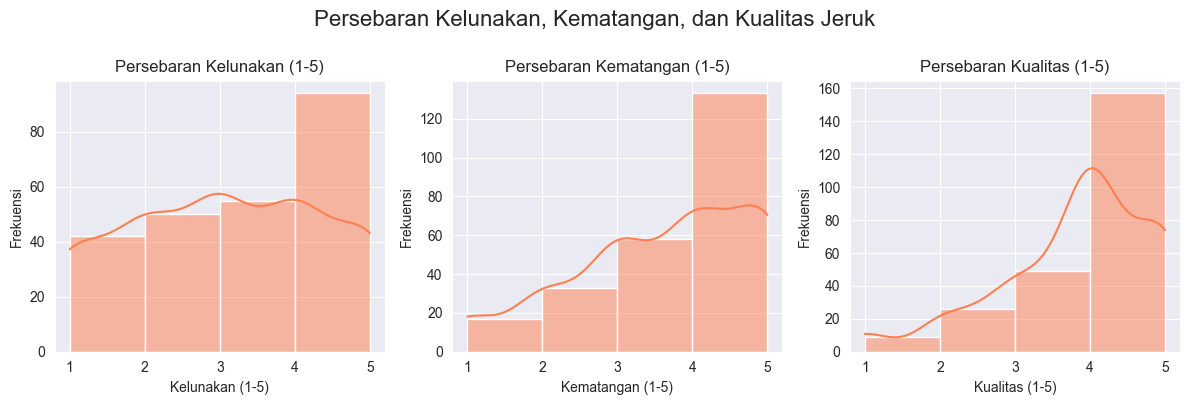

In [ ]:
other_columns = ['Kelunakan (1-5)', 'Kematangan (1-5)', 'Kualitas (1-5)']

rows = 1
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(12, 4))

for i, column in enumerate(other_columns):
    sns.histplot(data[column], ax=axes[i], bins=4, kde=True, color='coral')
    axes[i].set_title(f'Persebaran {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frekuensi')

plt.suptitle('Persebaran Kelunakan, Kematangan, dan Kualitas Jeruk', y=1, fontsize=16)
plt.tight_layout()
plt.show()

Distribusi data kolom di atas cenderung memiliki negative skewness terutama pada nilai kualitas yang berarti data ini cenderung terdiri atas jeruk dengan rating yang lebih baik.

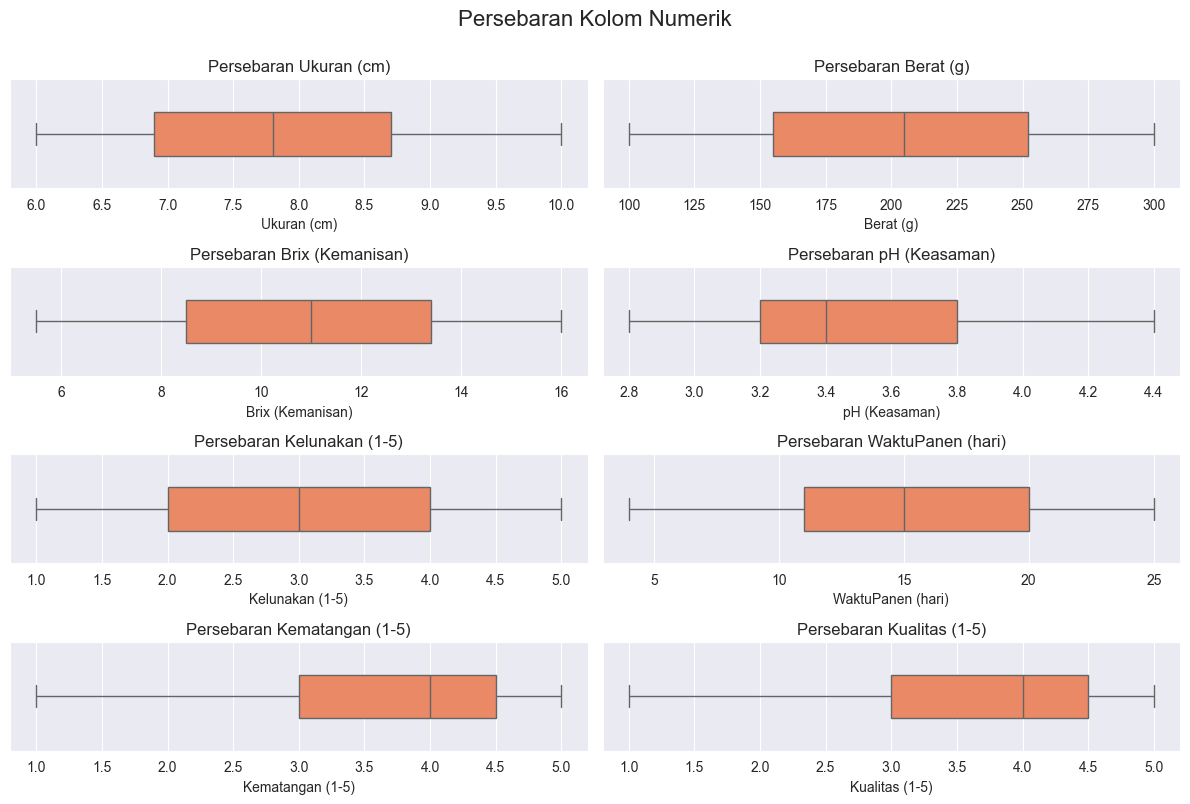

In [ ]:
num_columns = numerical.columns.tolist()

rows = 4
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

for i, column in enumerate(num_columns):
    row = i // cols
    col = i % cols
    sns.boxplot(data[column], ax=axes[row, col], orient='h', color='coral', width=0.4)
    axes[row, col].set_title(f'Persebaran {column}')
    axes[row, col].set_xlabel(column)

plt.suptitle('Persebaran Kolom Numerik', y=1, fontsize=16)
plt.tight_layout()

plt.show()

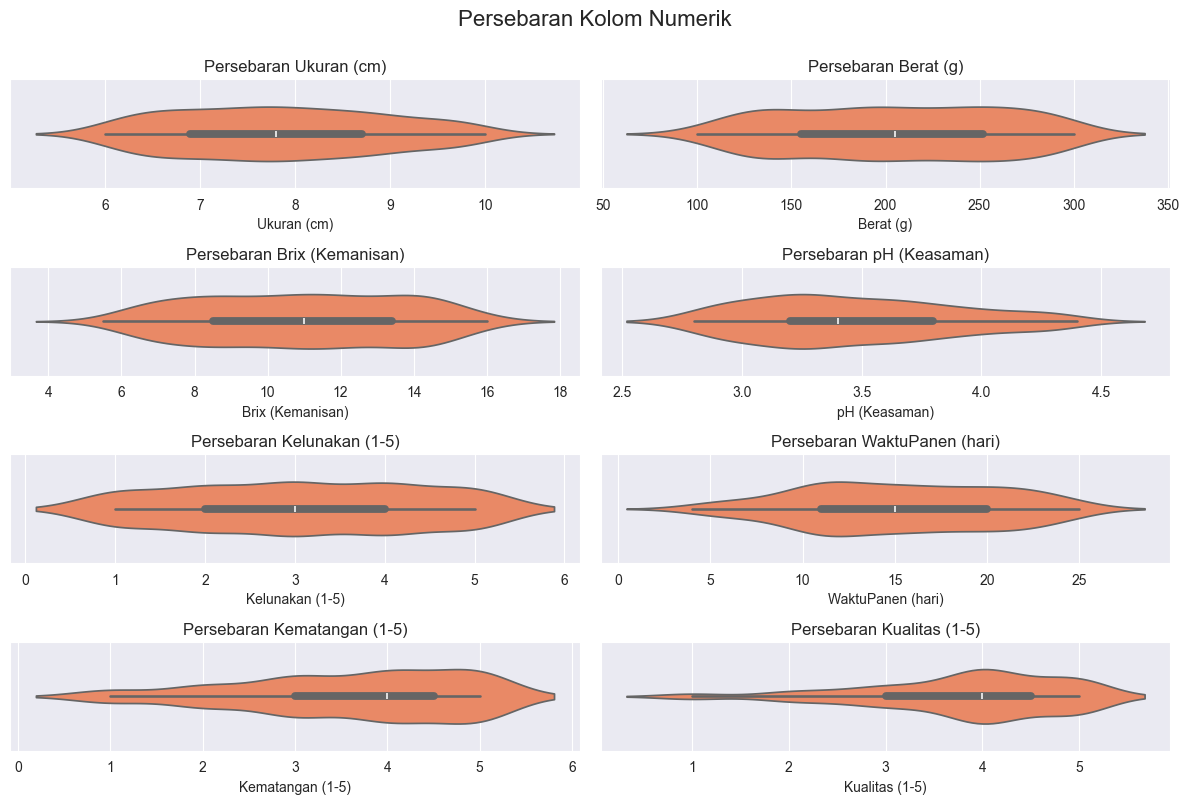

In [ ]:
num_columns = numerical.columns.tolist()

rows = 4
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

for i, column in enumerate(num_columns):
    row = i // cols
    col = i % cols
    sns.violinplot(data[column], ax=axes[row, col], orient='h', color='coral', width=0.5)
    axes[row, col].set_title(f'Persebaran {column}')
    axes[row, col].set_xlabel(column)

plt.suptitle('Persebaran Kolom Numerik', y=1, fontsize=16)
plt.tight_layout()

plt.show()

Bentuk persebaran ukuran, berat, dan kelunakan buah jeruk cukup simetris. Boxplot menunjukkan bahwa tidak terdapat nilai ekstrim/outlier pada tiap kolom. Violin plot menunjukkan bahwa kualitas buah memiliki persebaran yang paling mencong ke kiri (negative skew) dan jeruk dengan kualitas 4 cukup mendominasi data ini.

### b. Data Kategori
Bentuk visualisasi data yang digunakan :
- Bar plot : untuk melihat frekuensi data kategori
- Pie plot : untuk melihat persentase jumlah tiap data kategori

Visualisasi dilakukan terhadap kolom :
- Varietas
- Warna
- Blemishes (Yes/No)

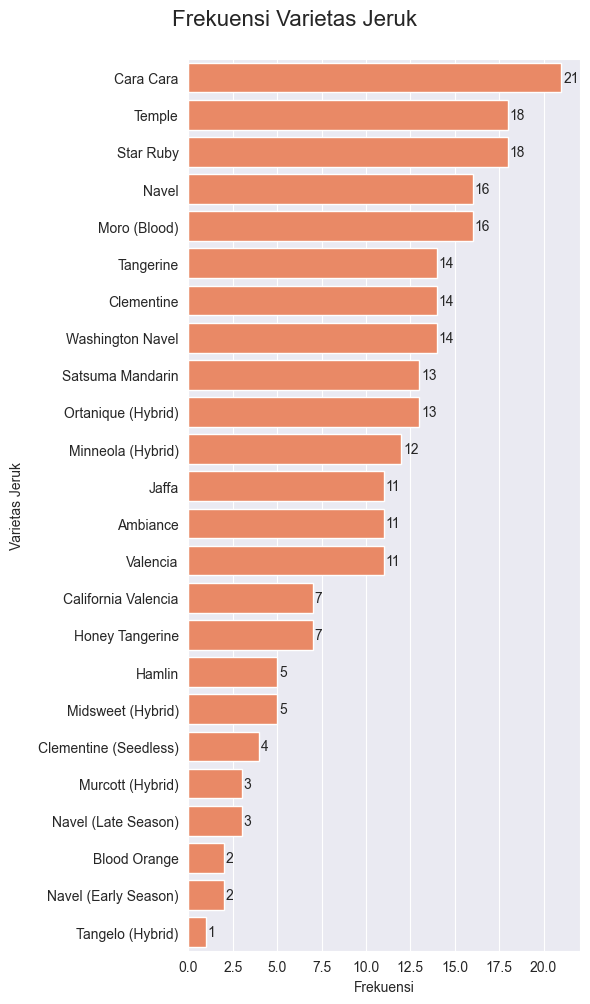

In [ ]:
fig, ax = plt.subplots(figsize=(6, 10))

variety_counts = data['Varietas'].value_counts()
sns.barplot(x=variety_counts.values, y=variety_counts.index, color='coral')
ax.set_ylabel('Varietas Jeruk', labelpad=10)
ax.set_xlabel('Frekuensi')

for i, v in enumerate(variety_counts.values):
    ax.text(v + 0.1, i, str(v), va='center')

plt.suptitle('Frekuensi Varietas Jeruk', y=1, fontsize=16)
plt.tight_layout()
plt.show()

5 varietas jeruk terbanyak adalah Cara Cara, Temple, Star Ruby, Navel, dan Moro (Blood).

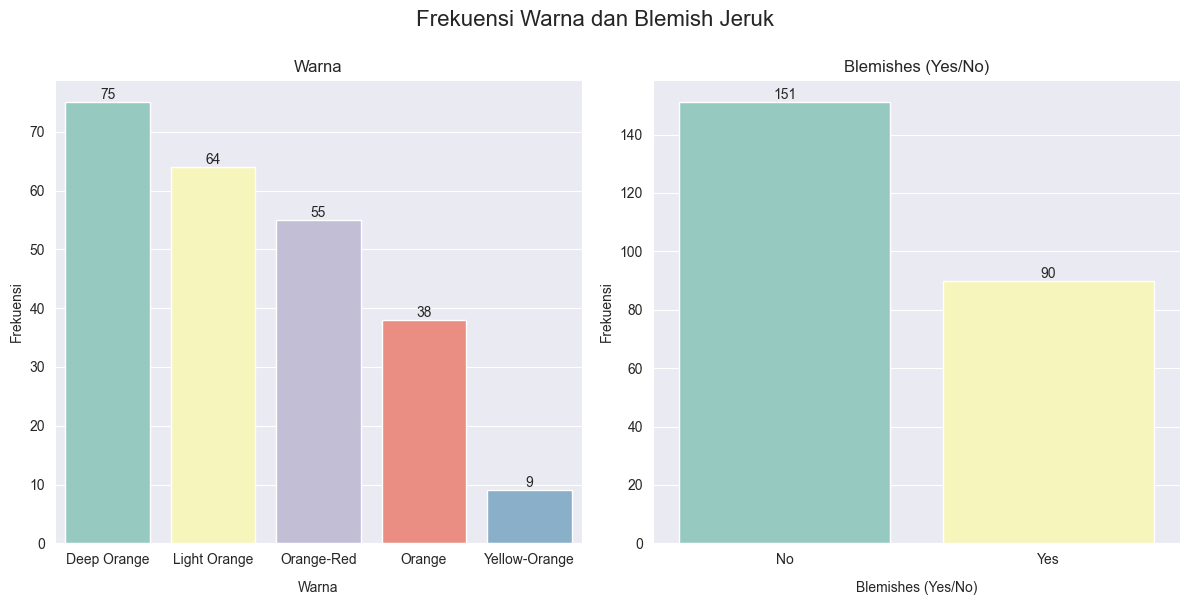

In [ ]:
cat_columns = ['Warna', 'Blemishes (Yes/No)']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, column in enumerate(cat_columns):
    category_counts = data[column].value_counts()
    bars = sns.barplot(x=category_counts.index, y=category_counts.values, ax=axes[i], palette="Set3")

    for index, value in enumerate(category_counts):
        axes[i].text(index, value, str(value), ha='center', va='bottom')

    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(column, labelpad=10)
    axes[i].set_ylabel('Frekuensi')

plt.suptitle('Frekuensi Warna dan Blemish Jeruk', y=1, fontsize=16)
plt.tight_layout()
plt.show()

Sebagian besar jeruk memiliki warna Deep Orange dan tidak memiliki noda.

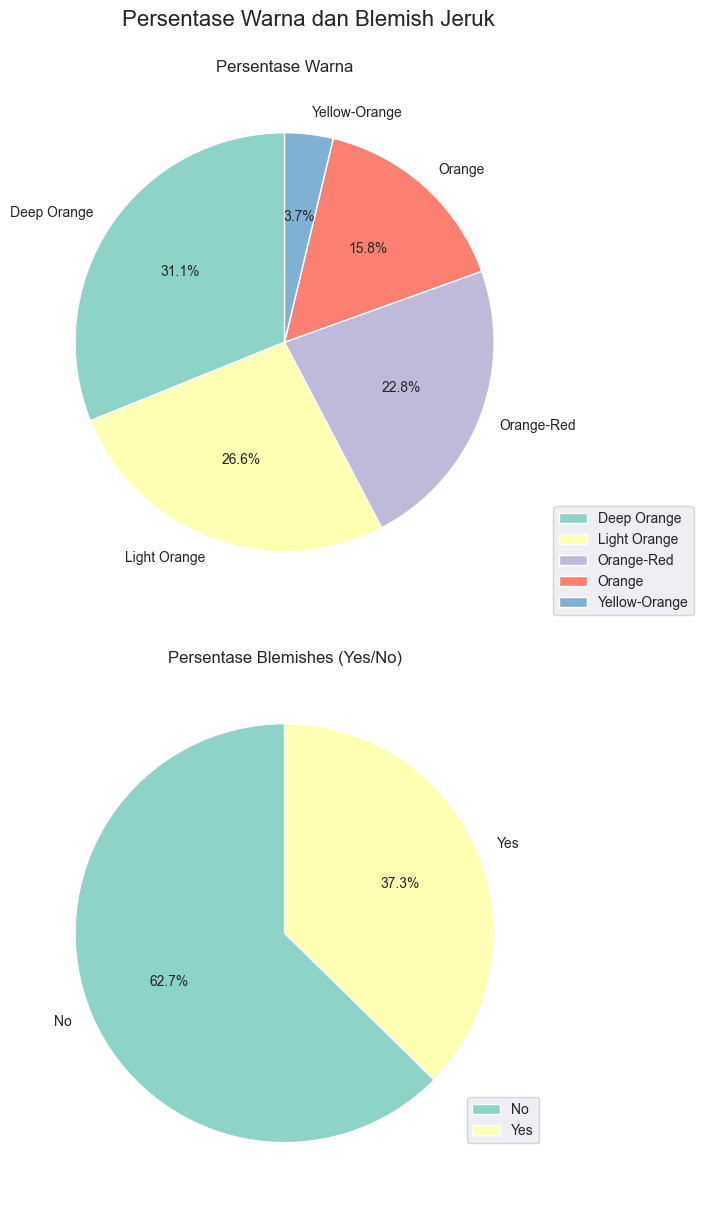

In [ ]:
palette = sns.color_palette("Set3")

fig, axes = plt.subplots(2, 1, figsize=(8, 12))

for i, column in enumerate(cat_columns):
    category_counts = data[column].value_counts()
    axes[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=palette,)
    axes[i].legend(loc="best", bbox_to_anchor=(1, 0.2))
    axes[i].set_title(f'Persentase {column}')

plt.suptitle('Persentase Warna dan Blemish Jeruk', y=1, fontsize=16)
plt.tight_layout()
plt.show()

Pie chart di atas menunjukkan persentase jumlah berdasarkan warna buah jeruk dan kemunculan noda/blemish pada jeruk. Terdapat sebanyak 31.1% jeruk yang berwarna deep Orange dan 62.7% jeruk yang tidak memiliki noda.

### c. Analisis Data

Berdasarkan eksplorasi yang telah dilakukan, terdapat beberapa pertanyaan yang cukup menarik untuk ditelusuri :
1. Varietas jeruk apa yang memiliki kualitas 5?
2. Berapa waktu panen jeruk dengan kualitas 5?
3. Bagaimana persebaran waktu setelah panen jeruk tiap nilai kualitas jeruk?

In [ ]:
data_uni = data.copy()
new_columns = ['Ukuran', 'Berat', 'Brix', 'Keasaman',
               'Kelunakan', 'WaktuPanen', 'Kematangan', 'Warna',
               'Varietas', 'Blemishes', 'Kualitas']
data_uni.columns = new_columns

In [ ]:
quality = data_uni.query('Kualitas == 5.0')
quality.head()

,Ukuran,Berat,Brix,Keasaman,Kelunakan,WaktuPanen,Kematangan,Warna,Varietas,Blemishes,Kualitas
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,No,5.0
9,7.8,190,12.0,3.1,2.0,11,4.5,Orange,Jaffa,No,5.0
13,7.0,140,11.0,3.2,2.5,8,4.5,Deep Orange,Washington Navel,No,5.0
15,6.3,120,14.5,2.9,1.0,6,5.0,Light Orange,Tangerine,No,5.0
21,8.1,205,11.0,3.4,2.5,14,4.5,Deep Orange,Murcott (Hybrid),No,5.0


In [ ]:
quality.shape

(52, 11)

Bagian di atas melakukan pengambilan data baru untuk kualitas jeruk yang bernilai 5.0

#### 1. Varietas jeruk yang memiliki kualitas 5

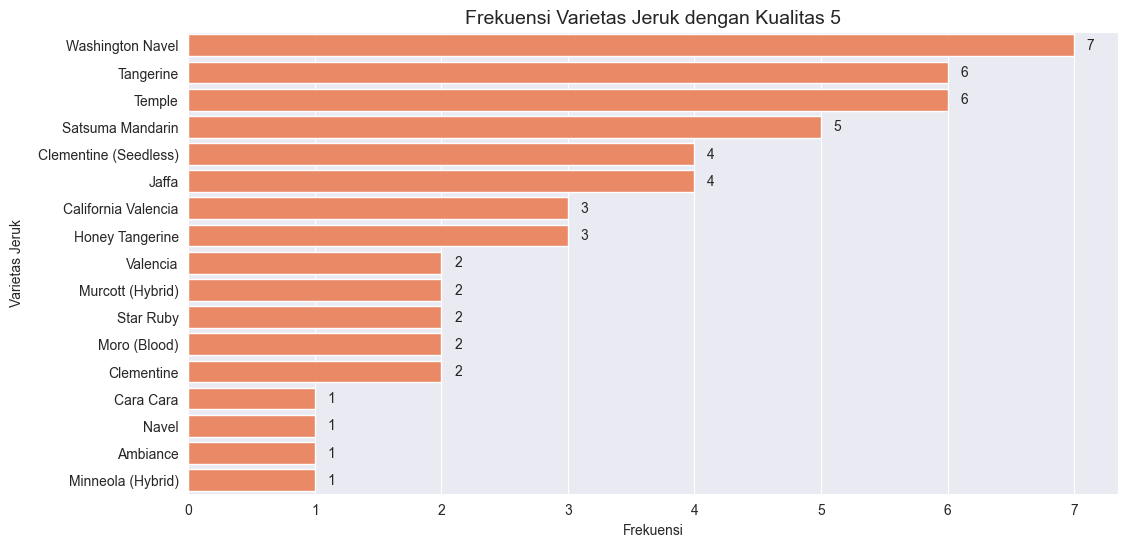

In [ ]:
plt.figure(figsize=(12, 6))

variety_counts = quality['Varietas'].value_counts()
sns.barplot(x=variety_counts.values, y=variety_counts.index, color='coral')
plt.ylabel('Varietas Jeruk', labelpad=10)
plt.xlabel('Frekuensi')
for i, v in enumerate(variety_counts.values):
    plt.text(v + 0.1, i, str(v), va='center')
plt.title('Frekuensi Varietas Jeruk dengan Kualitas 5', y=1, fontsize=14)

plt.show()

Terdapat 17 dari 24 varietas yang memiliki kualitas 5. Washington Navel, Tangerine, dan Temple merupakan varietas dengan jumlah yang terbanyak sehingga apabila seseorang ingin membeli jeruk berkualitas balik sebaiknya membeli 3 jenis jeruk tersebut.

#### 2. Waktu pasca panen jeruk dengan kualitas 5

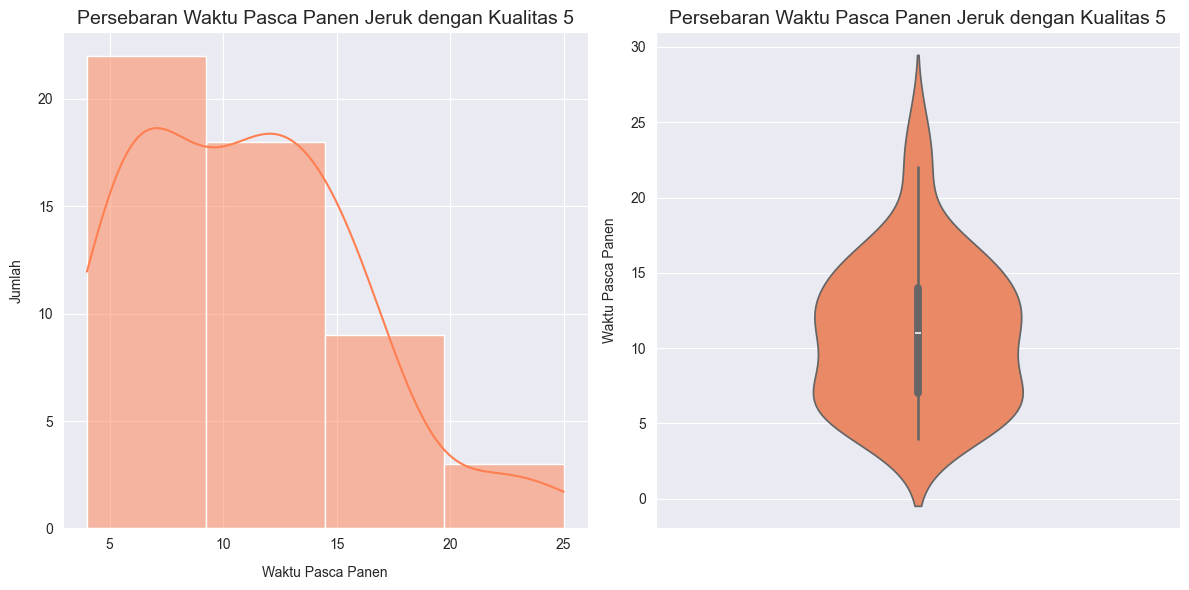

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(quality['WaktuPanen'], bins=4, kde=True, color='coral')
plt.xlabel('Waktu Pasca Panen', labelpad=10)
plt.ylabel('Jumlah', labelpad=10)
plt.title('Persebaran Waktu Pasca Panen Jeruk dengan Kualitas 5', y=1, fontsize=14)

plt.subplot(1, 2, 2)
sns.violinplot(quality['WaktuPanen'], color='coral', width=0.4)
plt.ylabel('Waktu Pasca Panen', labelpad=10)
plt.title('Persebaran Waktu Pasca Panen Jeruk dengan Kualitas 5', y=1, fontsize=14)

plt.tight_layout()
plt.show()

Jeruk berkualitas 5 cenderung memiliki waktu pasca panen 5-15 hari.

#### 3. Persebaran waktu pasca panen jeruk

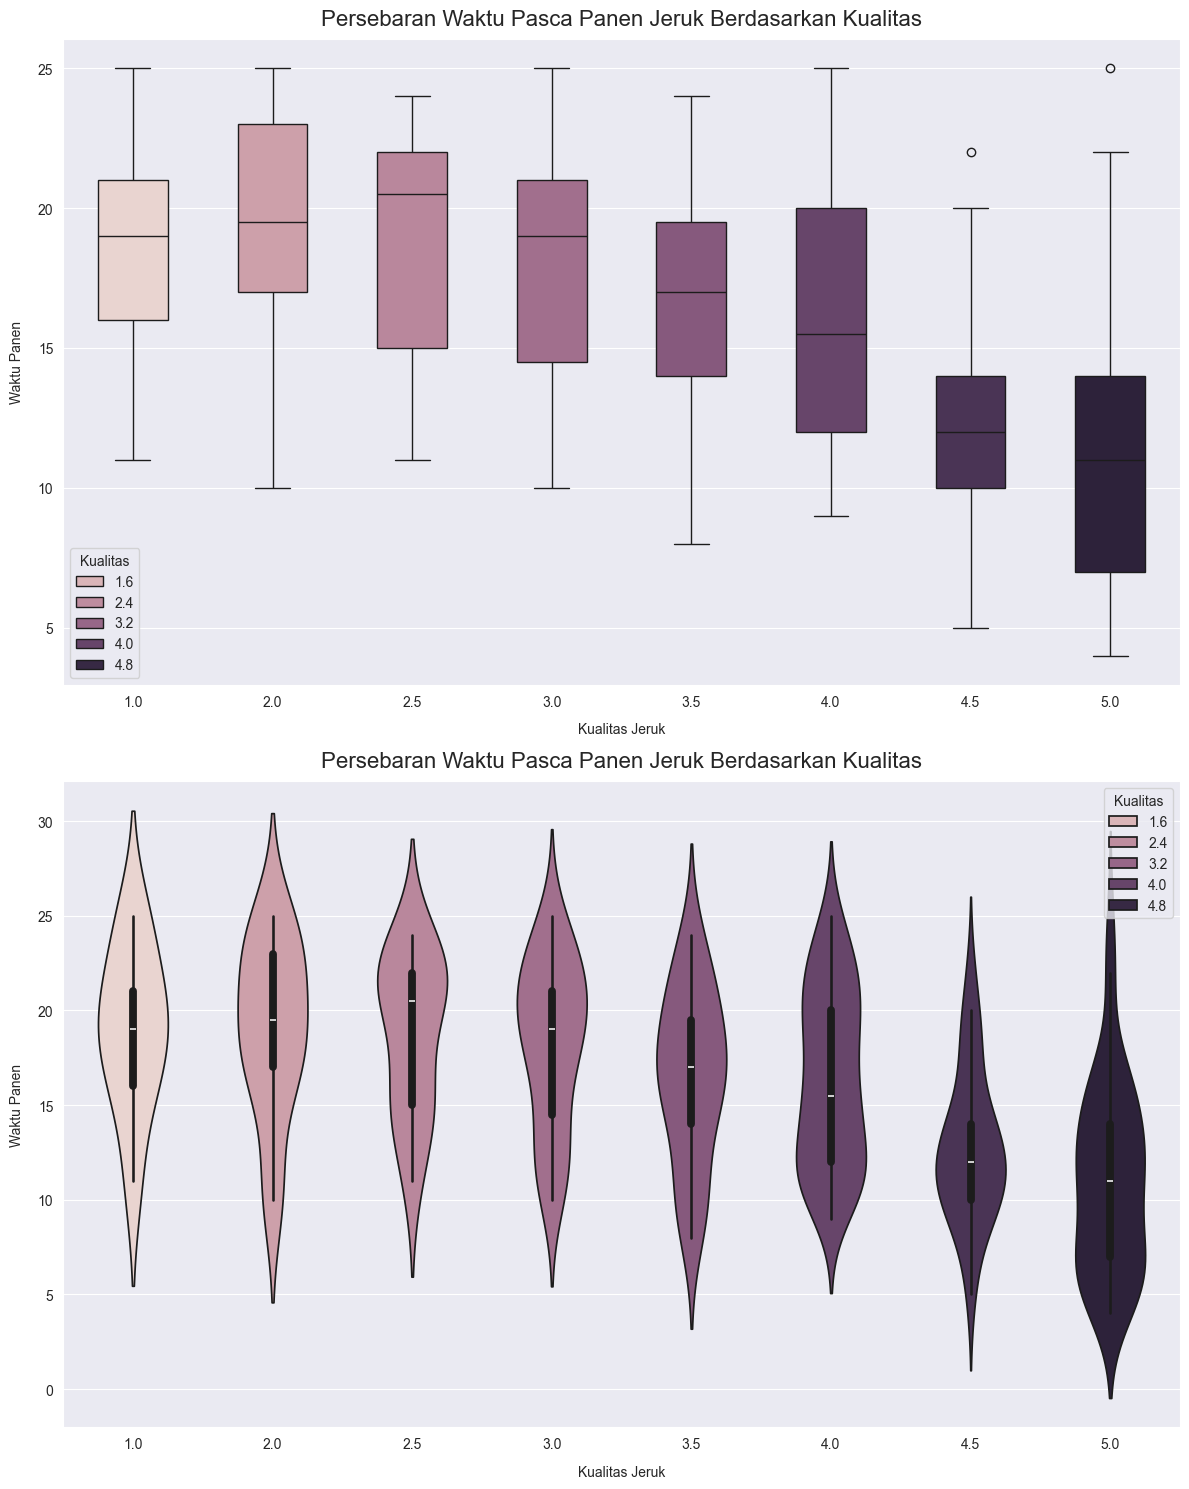

In [ ]:
quality_order = sorted(data_uni['Kualitas'].unique())

plt.figure(figsize=(12, 15))

plt.subplot(2, 1, 1)
sns.boxplot(x='Kualitas', y='WaktuPanen', data=data_uni, order=quality_order, hue='Kualitas', width=0.5)
plt.title('Persebaran Waktu Pasca Panen Jeruk Berdasarkan Kualitas', pad=10, fontsize=16)
plt.xlabel('Kualitas Jeruk', labelpad=10)
plt.ylabel('Waktu Panen', labelpad=10)
plt.xticks(rotation=0)

plt.subplot(2, 1, 2)
sns.violinplot(x='Kualitas', y='WaktuPanen', data=data_uni, order=quality_order, hue='Kualitas', width=0.5)
plt.title('Persebaran Waktu Pasca Panen Jeruk Berdasarkan Kualitas', pad=10, fontsize=16)
plt.xlabel('Kualitas Jeruk', labelpad=10)
plt.ylabel('Waktu Panen', labelpad=10)
#plt.legend(loc="best", bbox_to_anchor=(0.1, 0.2))
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Jeruk dengan kualitas 4.5 dan 5.0 memiliki rentang hari pasca panen yang lebih kecil daripada rating kualitas lainnya. Hal ini menunjukkan bahwa jeruk yang memiliki hari pasca panen kecil cenderung memiliki kualitas yang lebih baik.

## 3. Bi/Multivariate Analysis
Memahami hubungan antara 2 variabel atau lebih. Kemudian melakukan analisis pada beberapa variabel terhadap kualitas jeruk.

### a. Pairplot
Seaborn memiliki fungsi `pairplot` yang dapat digunakan untuk generate scatterplot antar variabel. Seluruh plot akan digambarkan dalam bentuk matriks. Pair plot ini berguna untuk melihat ada atau tidaknya hubungan antara data secara sekilas.

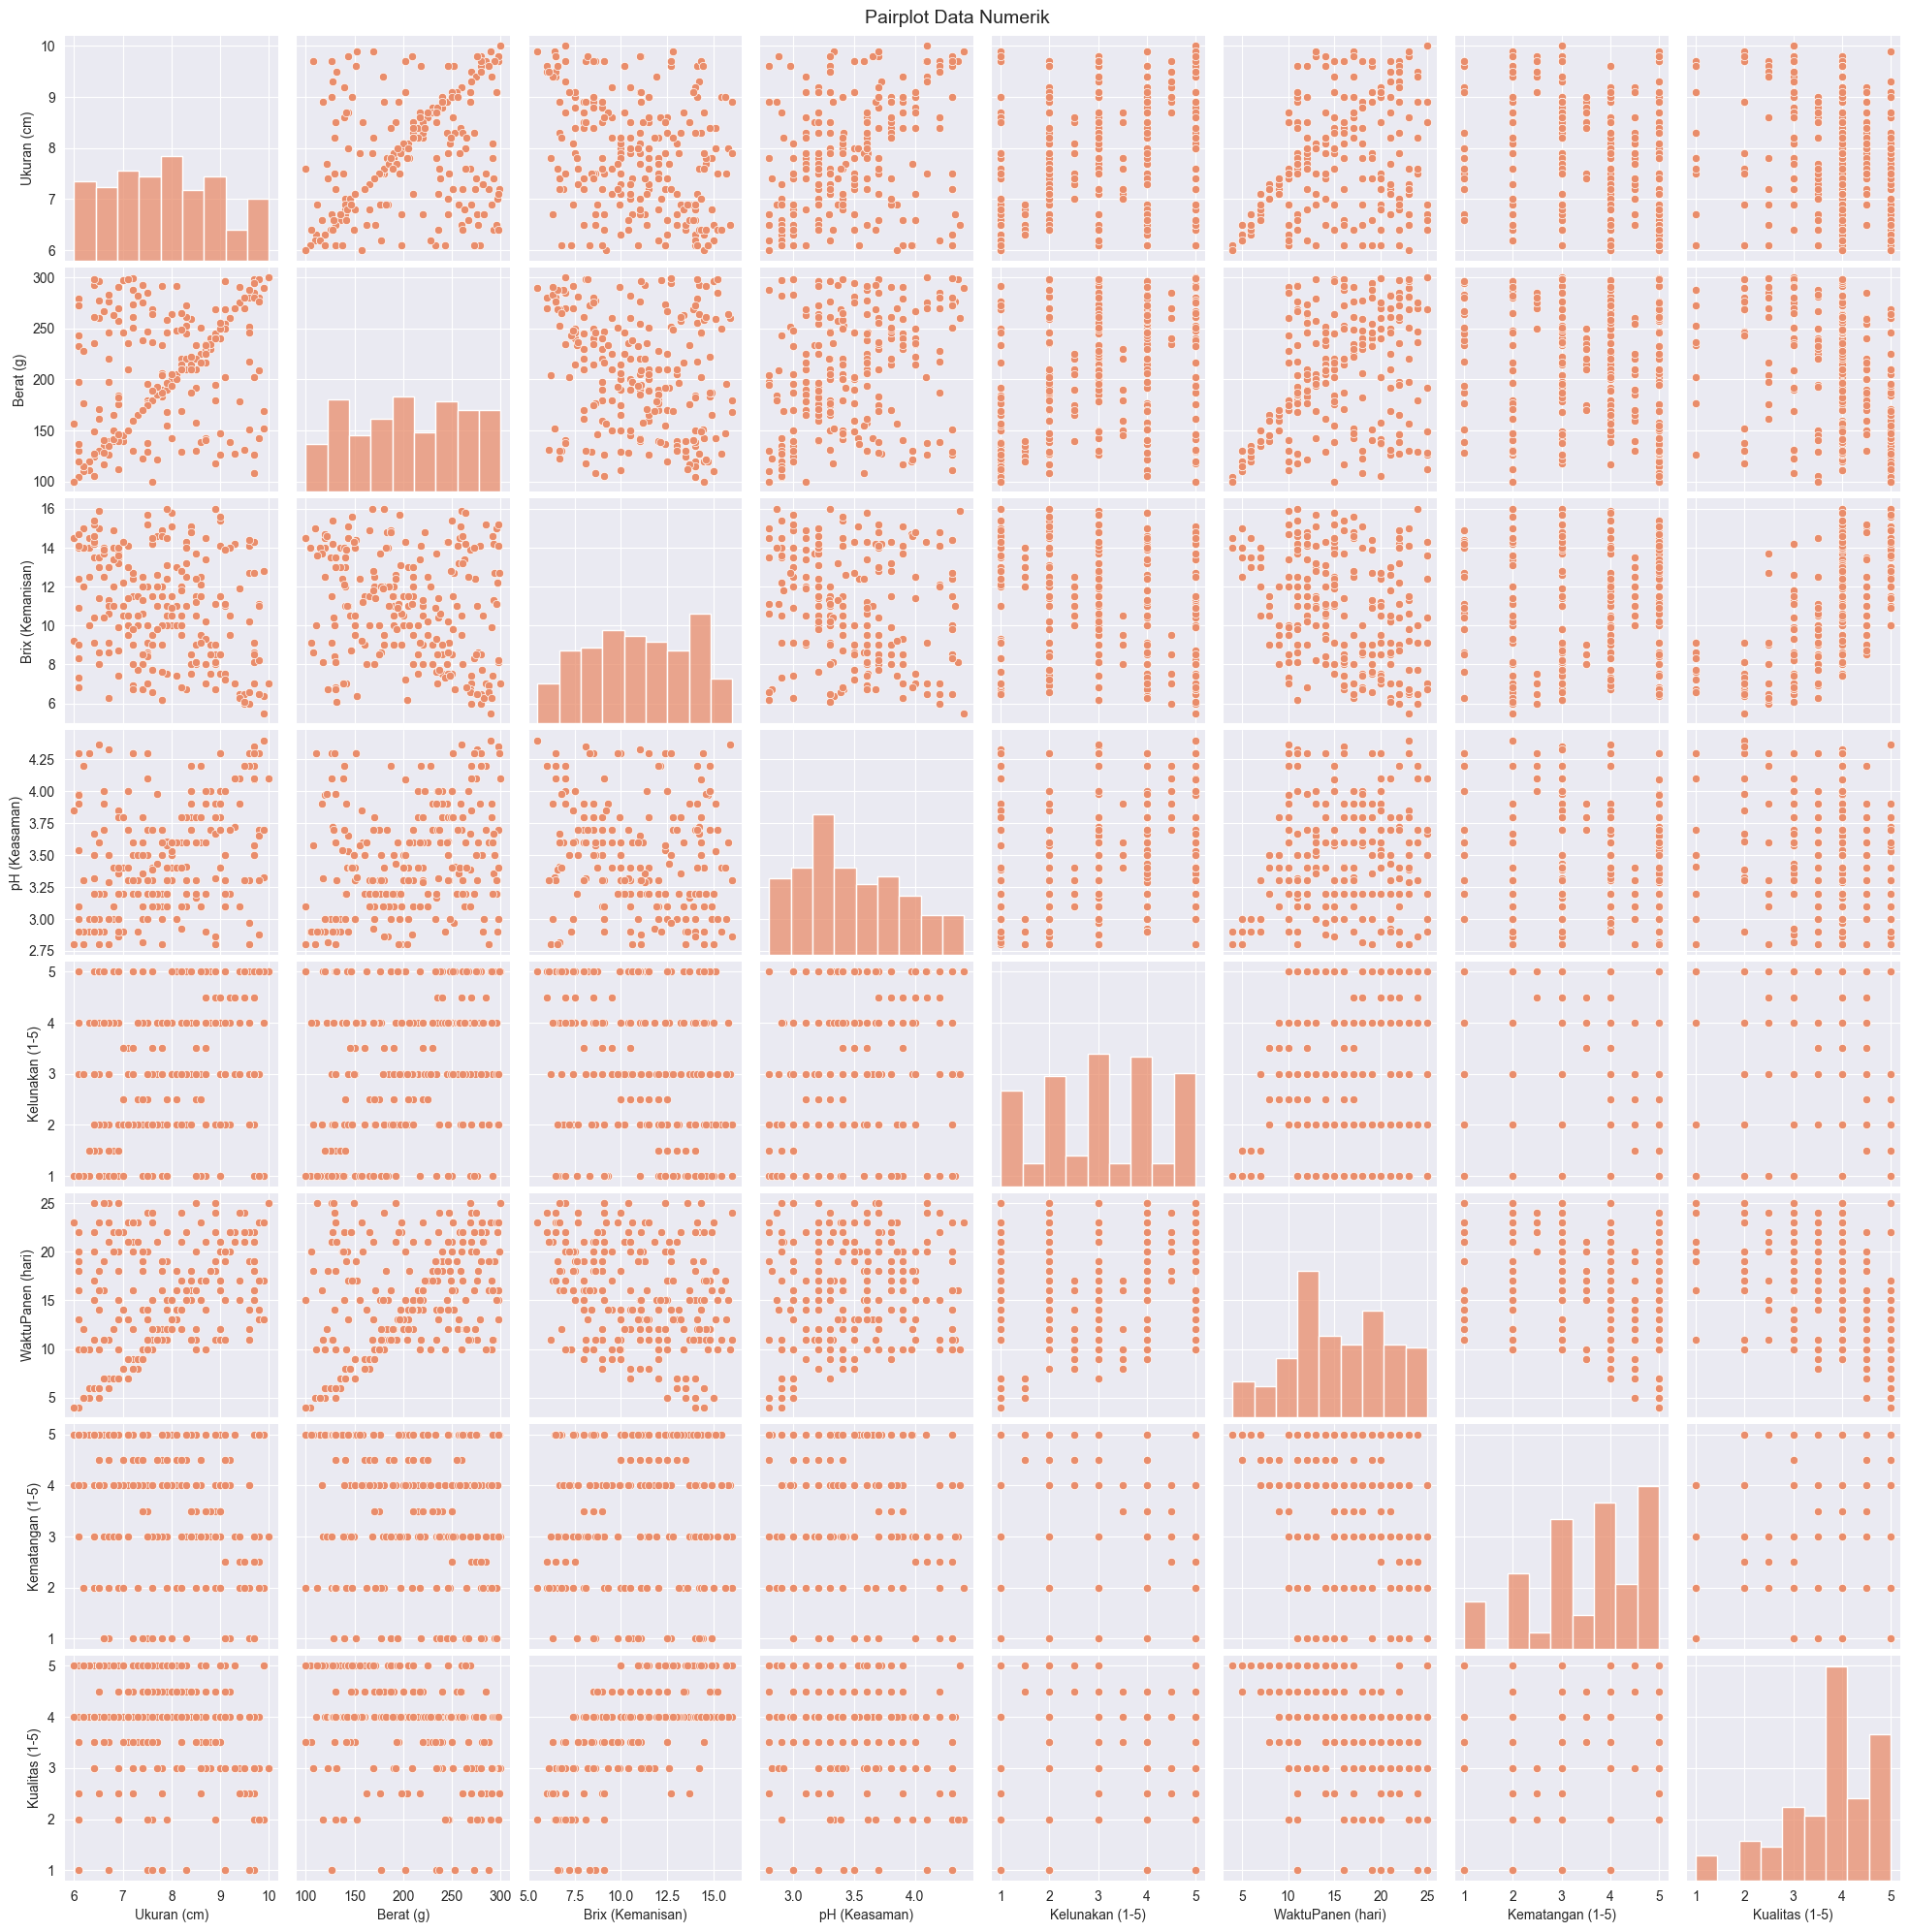

In [ ]:
# Dilakukan terhadpa data numerik
sns.pairplot(data=numerical, palette='Set2')
plt.suptitle('Pairplot Data Numerik', y=1, fontsize=14)
plt.show()

Pairplot di atas menunjukkan bahwa hubungan antara seluruh pasangan variabel cenderung beragam. Untuk mengetahui lebih pasti mengenai tingkat hubungan antar variabel perlu dilakukan perhitungan korelasi.

### b. Perhitungan Korelasi
Menghitung besarnya hubungan antara 2 variabel menggunakan fungsi `corr()` pandas. Metode yang digunakan adalah pearson. Perhitungan hanya akan dilakukan terhadap data numerik.

In [ ]:
data_corr = numerical.copy()
data_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ukuran (cm)        241 non-null    float64
 1   Berat (g)          241 non-null    int64  
 2   Brix (Kemanisan)   241 non-null    float64
 3   pH (Keasaman)      241 non-null    float64
 4   Kelunakan (1-5)    241 non-null    float64
 5   WaktuPanen (hari)  241 non-null    int64  
 6   Kematangan (1-5)   241 non-null    float64
 7   Kualitas (1-5)     241 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 15.2 KB


Melakukan normalisasi data menggunakan fungsi `MinMaxScaler` scikit-learn untuk menyamakan rentang nilai sebagai ketentuan perhitungan korelasi.

In [ ]:
scaler = MinMaxScaler()
data_corr = pd.DataFrame(scaler.fit_transform(data_corr), columns=data_corr.columns)
correlation = data_corr.corr('pearson').round(4)

Memvisualisasikan hasil perhitungan korelasi menggunakan heatmap.

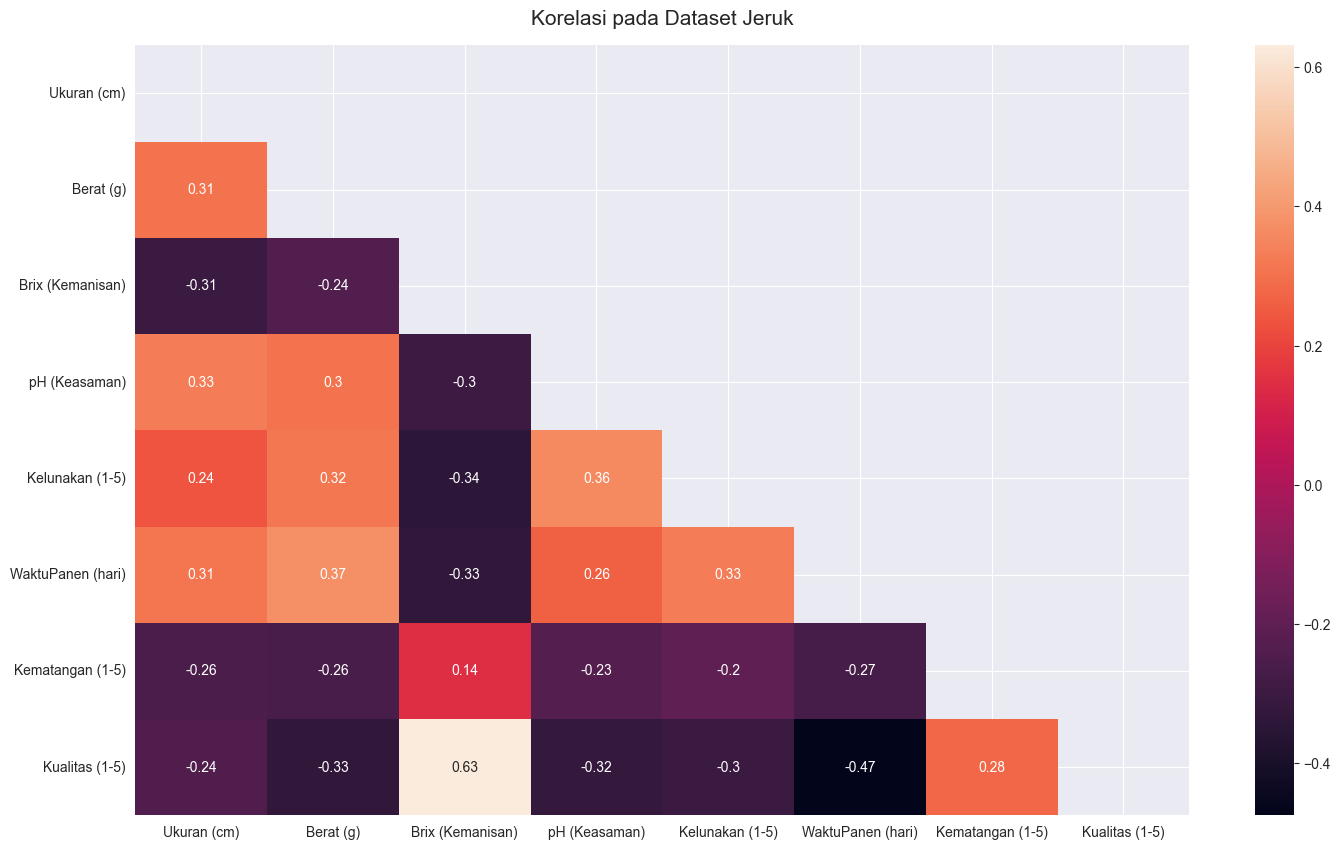

In [ ]:
plt.subplots(figsize=(17, 10))

mask = np.triu(np.ones_like(correlation, dtype=bool))

ax = sns.heatmap(correlation, mask=mask, annot=True)

ax.set_title("Korelasi pada Dataset Jeruk", fontsize=15, pad=15.0)

ax.xaxis.set_label_position('bottom')

plt.show()

Pasangan variabel yang memiliki nilai korelasi tertinggi adalah Brix dengan Kualitas yaitu sebesar 0.63 yang berarti hubungan antara kedua variabel tersebut cukup kuat dan memiliki arah positif.

### c. Analisis Data
Analisis dilakukan untuk menelusuri lebih lanjut hubungan antara beberapa variabel bebas terhadap kualitas jeruk.

#### 1. Hubungan Keasaman dengan Kualitas Jeruk

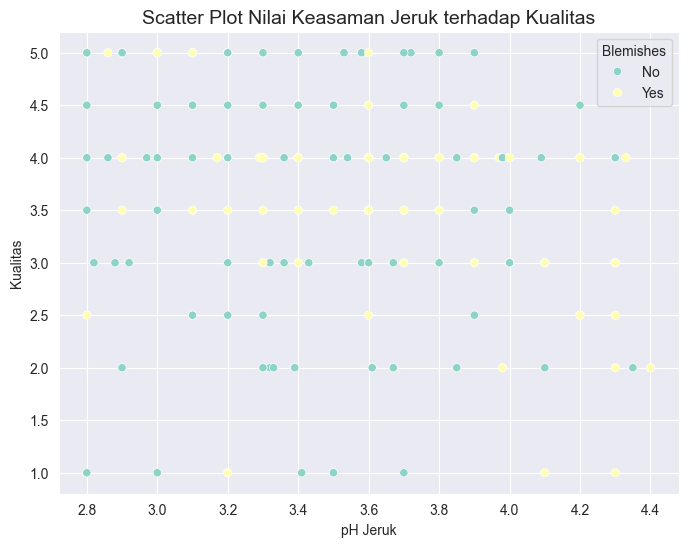

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Keasaman',
                y='Kualitas',
                hue='Blemishes',
                palette='Set3',
                data=data_uni)

plt.xlabel('pH Jeruk')
plt.title('Scatter Plot Nilai Keasaman Jeruk terhadap Kualitas', y=1, fontsize=14)
plt.show()

Nilai keasaman dengan kualitas memiliki hubungan yang cukup lemah yaitu sebesar -0.32. Hubungan memiliki arah negatif yang berarti semakin tinggi nilai pH jeruk (jeruk semakin tidak asam) maka kualitas jeruk akan semakin menurun.

#### 2. Hubungan Waktu Panen Terhadap Kualitas

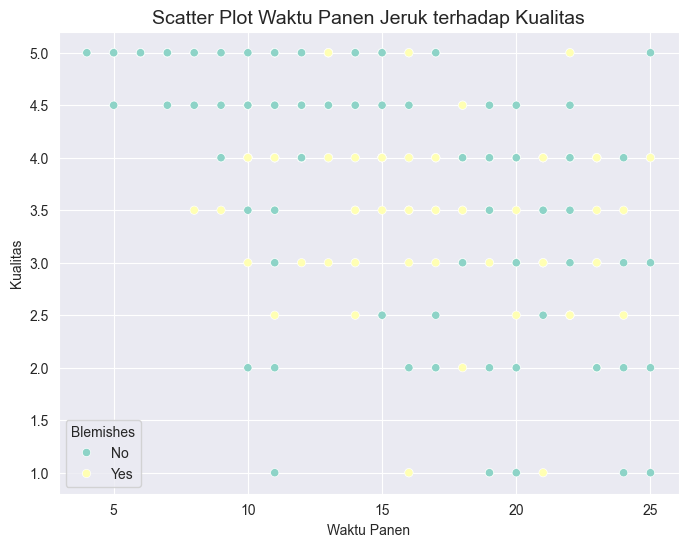

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='WaktuPanen',
                y='Kualitas',
                hue='Blemishes',
                palette='Set3',
                data=data_uni)

plt.xlabel('Waktu Panen')
plt.title('Scatter Plot Waktu Panen Jeruk terhadap Kualitas', y=1, fontsize=14)
plt.show()

Waktu pasca panen dengan kualitas memiliki hubungan yang cukup lemah yaitu sebesar -0.47. Hubungan memiliki arah negatif yang berarti semakin lama waktu pasca panen maka kualitas jeruk akan semakin menurun.

Frekuensi kemunculan noda juga cukup menggambarkan kualitas yang dimiliki jeruk. Banyak jeruk dengan kualitas 4.5 dan 5.0 yang cenderung tidak memiliki noda.

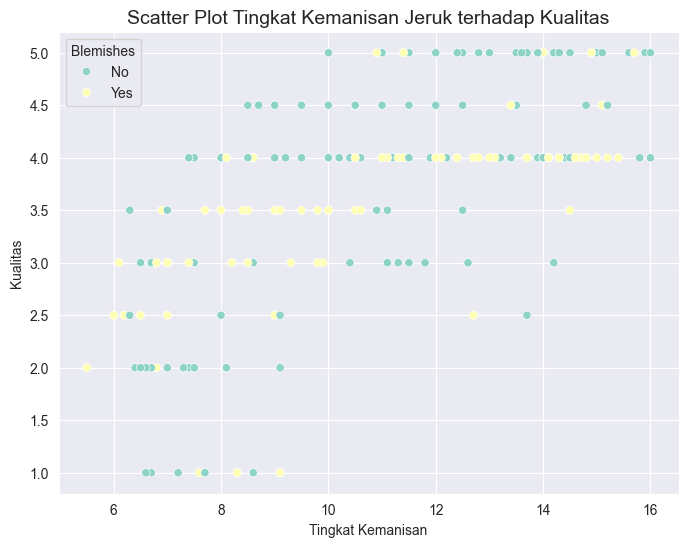

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Brix',
                y='Kualitas',
                hue='Blemishes',
                palette='Set3',
                data=data_uni)

plt.xlabel('Tingkat Kemanisan')
plt.title('Scatter Plot Tingkat Kemanisan Jeruk terhadap Kualitas', y=1, fontsize=14)
plt.show()

Tingkat kemanisan dengan kualitas memiliki hubungan yang cukup kuat yaitu sebesar -0.47. Hubungan memiliki arah positif yang berarti semakin tinggi nilai kemanisan buah jeruk maka nilai kualitas jeruk juga akan semakin meningkat.